In [1]:
!pip install pandas pyarrow fastparquet


In [2]:
!pip install matplotlib seaborn


In [3]:
import pandas as pd
import pyarrow.parquet as pq
import json
import os
import seaborn as sns
import matplotlib.pyplot as plt

directory = r'C:\Users\vijay\Downloads\Invex'

def extract_data(ground_truth):
    try:
        data = json.loads(ground_truth)
        menu_items = data.get('gt_parse', {}).get('menu', [])
        
        if isinstance(menu_items, dict):
            menu_items = [menu_items]
        
        extracted_data = []
        for item in menu_items:
            nm = item.get('nm', 'N/A')
            unitprice = item.get('unitprice', 'N/A')
            qty = item.get('qty', 'N/A')
            price = item.get('price', 'N/A')
            extracted_data.append([nm, unitprice, qty, price])
        
        return extracted_data
    except json.JSONDecodeError:
        return []

for filename in os.listdir(directory):
    if filename.endswith('.parquet'):
        file_path = os.path.join(directory, filename)
        print(f"\nProcessing file: {filename}")
        
        df = pd.read_parquet(file_path)
        
        if 'ground_truth' in df.columns:
            print("File loaded successfully.")
            all_extracted_data = []
            for index, row in df.iterrows():
                ground_truth = row['ground_truth']
                extracted_data = extract_data(ground_truth)
                all_extracted_data.extend(extracted_data)

            extracted_df = pd.DataFrame(all_extracted_data, columns=['Name', 'Unit Price', 'Quantity', 'Price'])
            print(extracted_df.head())
        else:
            print("The expected columns are not present in this file.")



Processing file: test-00000-of-00001-f6c27485d73a0328.parquet
File loaded successfully.
               Name Unit Price Quantity   Price
0        -TICKET CP        N/A      N/A  60.000
1       J.STB PROMO        N/A      N/A   17500
2           Y.B.BAT        N/A      N/A   46000
3       Y.BASO PROM        N/A      N/A   27500
4  JASMINE MT ( L )        N/A      N/A  24,000

Processing file: train-00000-of-00004-4ecdadef88e06e74.parquet
File loaded successfully.
               Name Unit Price Quantity    Price
0  Nasi Campur Bali        N/A      N/A   75,000
1   Bbk Bengil Nasi        N/A      N/A  125,000
2  MilkShake Starwb        N/A      N/A   37,000
3     Ice Lemon Tea        N/A      N/A   24,000
4  Nasi Ayam Dewata        N/A      N/A   70,000

Processing file: train-00001-of-00004-746b6acd0207b060.parquet
File loaded successfully.
                       Name Unit Price Quantity   Price
0                NASI PUTIH      6,000      N/A   6.000
1                 BASO KUAH     43,63

In [4]:
output_dir = r'C:\Users\vijay\INVEX\plots'
os.makedirs(output_dir, exist_ok=True)





Processing file: test-00000-of-00001-f6c27485d73a0328.parquet
File loaded successfully.
               Name Unit Price Quantity   Price
0        -TICKET CP        N/A      N/A  60.000
1       J.STB PROMO        N/A      N/A   17500
2           Y.B.BAT        N/A      N/A   46000
3       Y.BASO PROM        N/A      N/A   27500
4  JASMINE MT ( L )        N/A      N/A  24,000


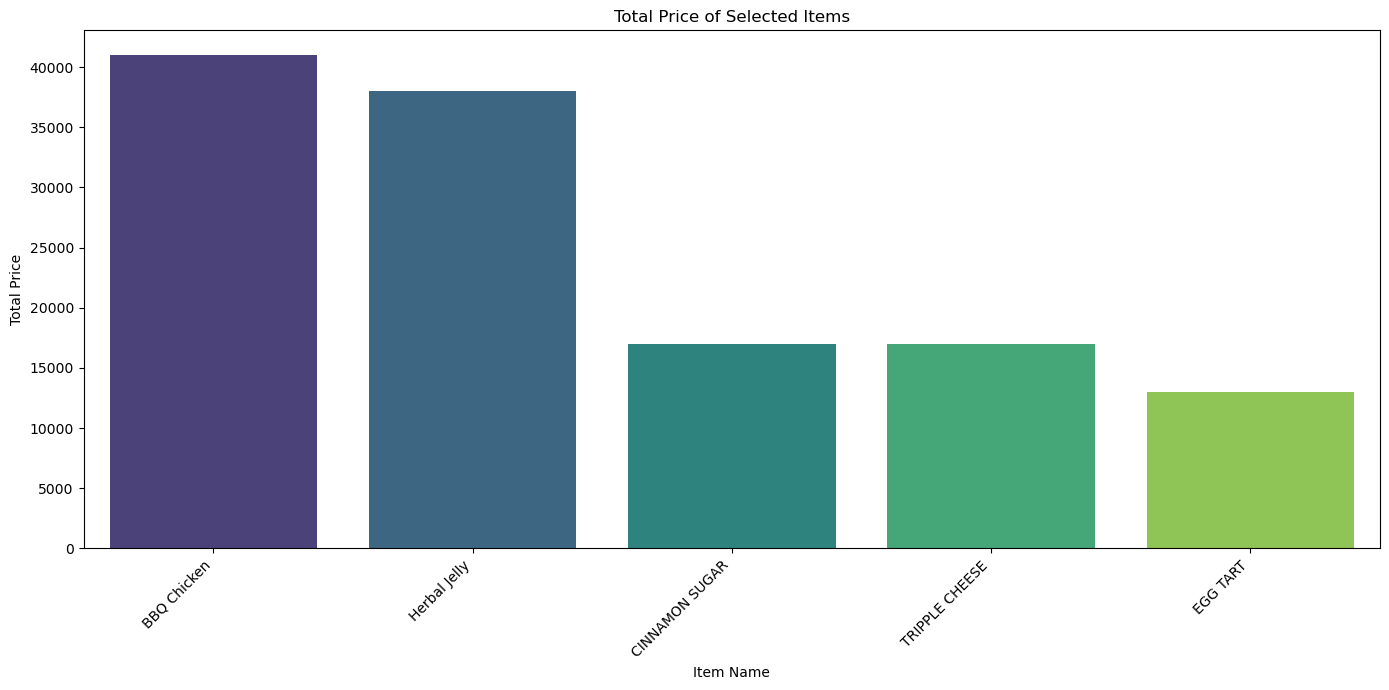

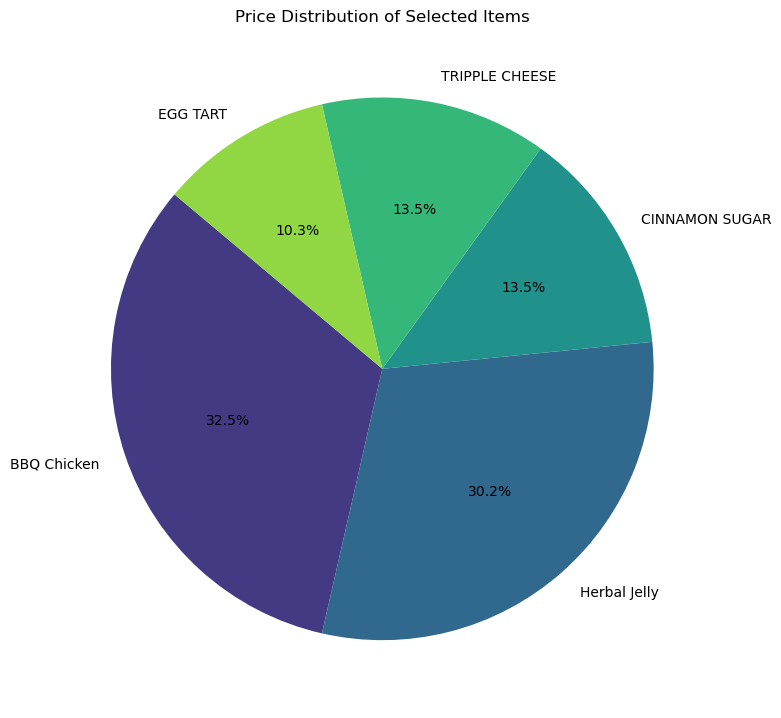

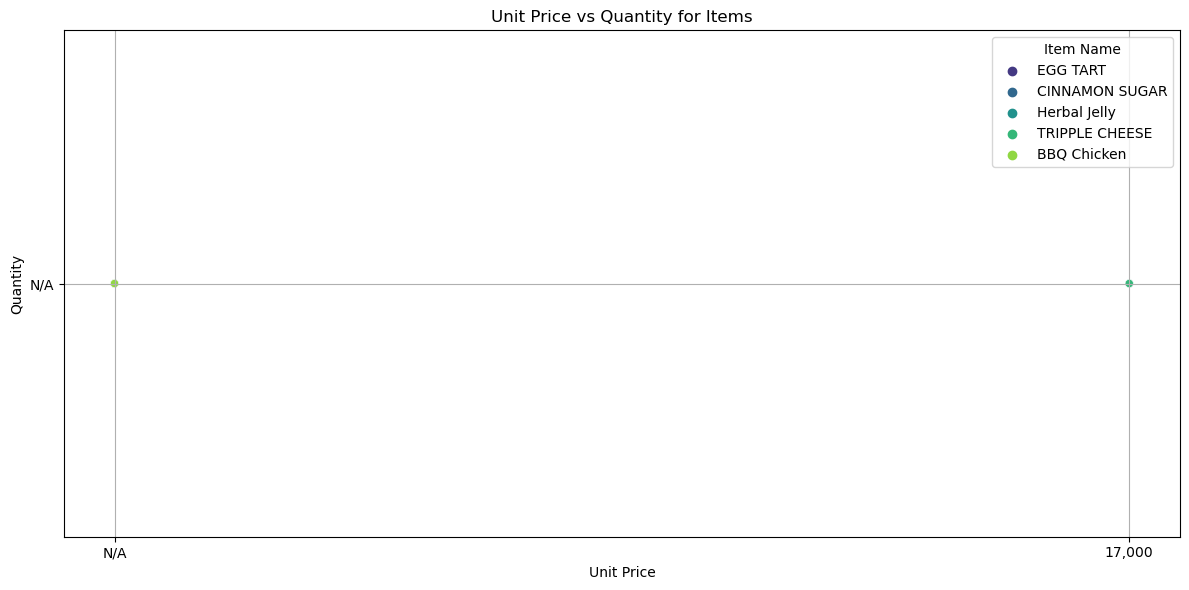

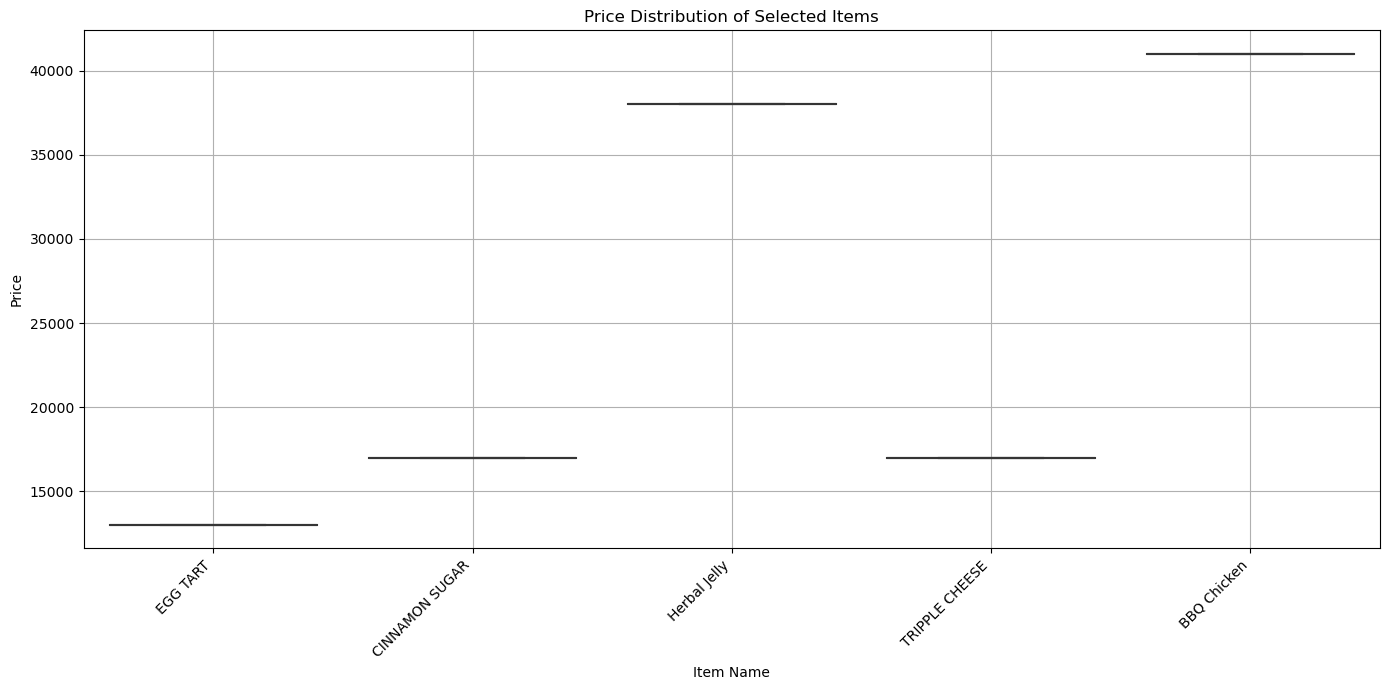


Processing file: train-00000-of-00004-4ecdadef88e06e74.parquet
File loaded successfully.
               Name Unit Price Quantity    Price
0  Nasi Campur Bali        N/A      N/A   75,000
1   Bbk Bengil Nasi        N/A      N/A  125,000
2  MilkShake Starwb        N/A      N/A   37,000
3     Ice Lemon Tea        N/A      N/A   24,000
4  Nasi Ayam Dewata        N/A      N/A   70,000


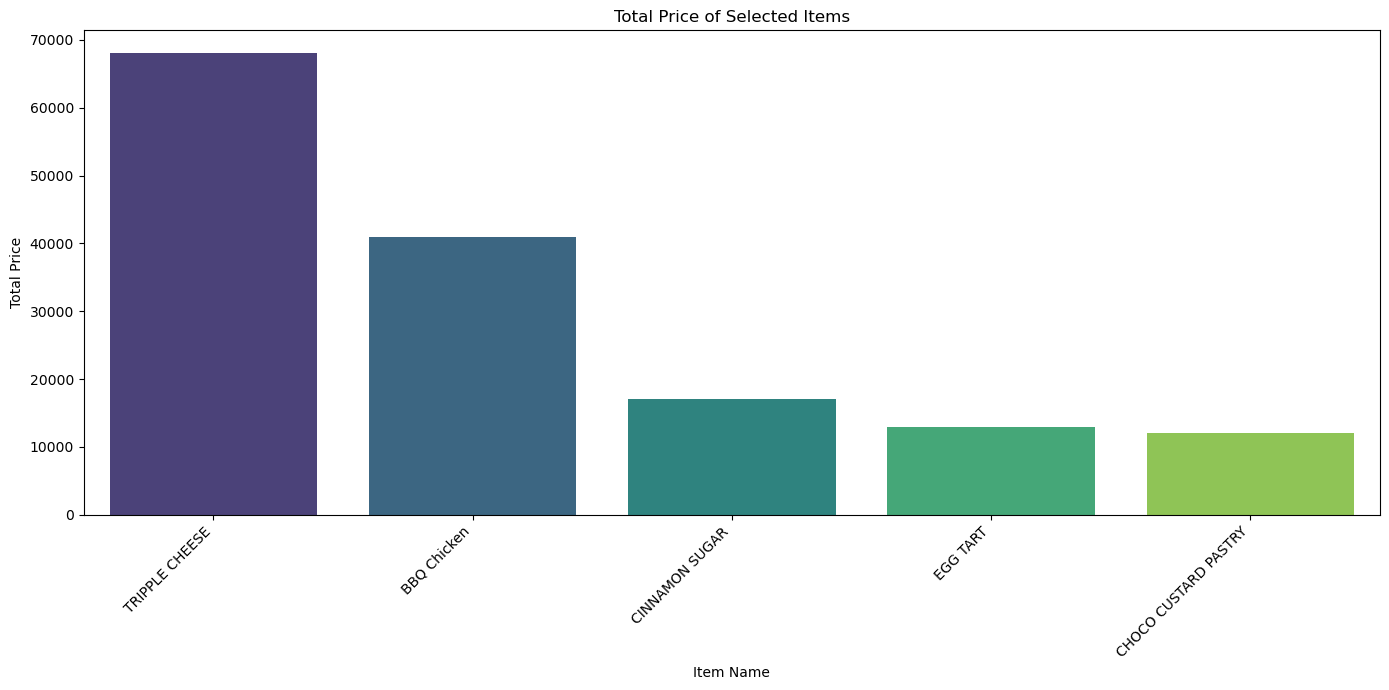

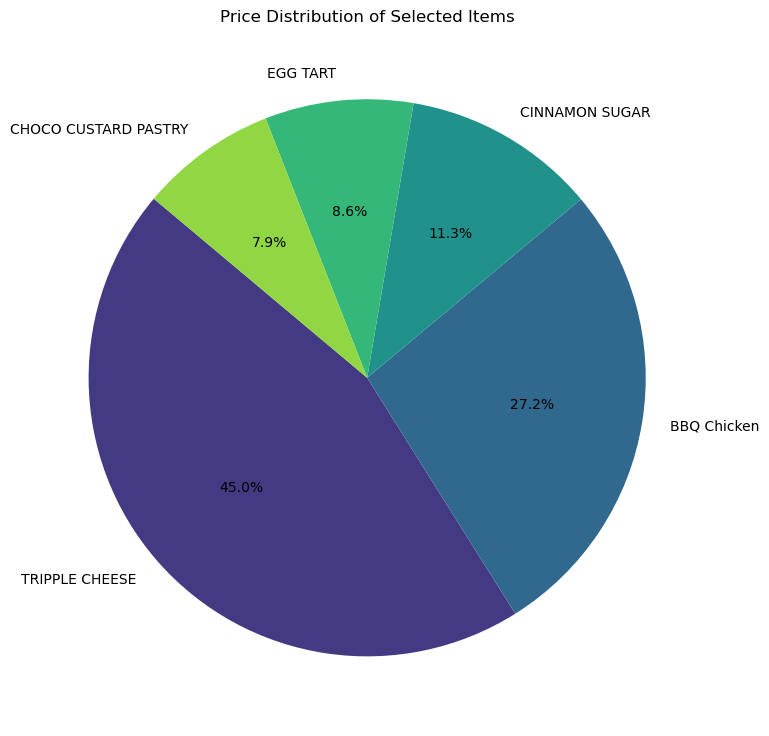

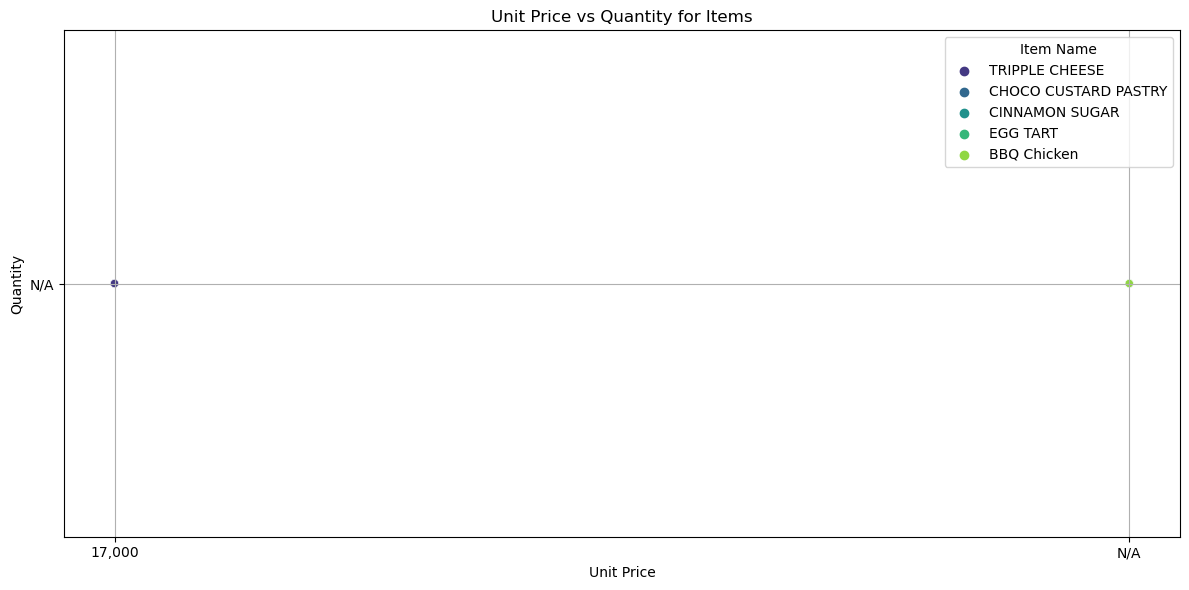

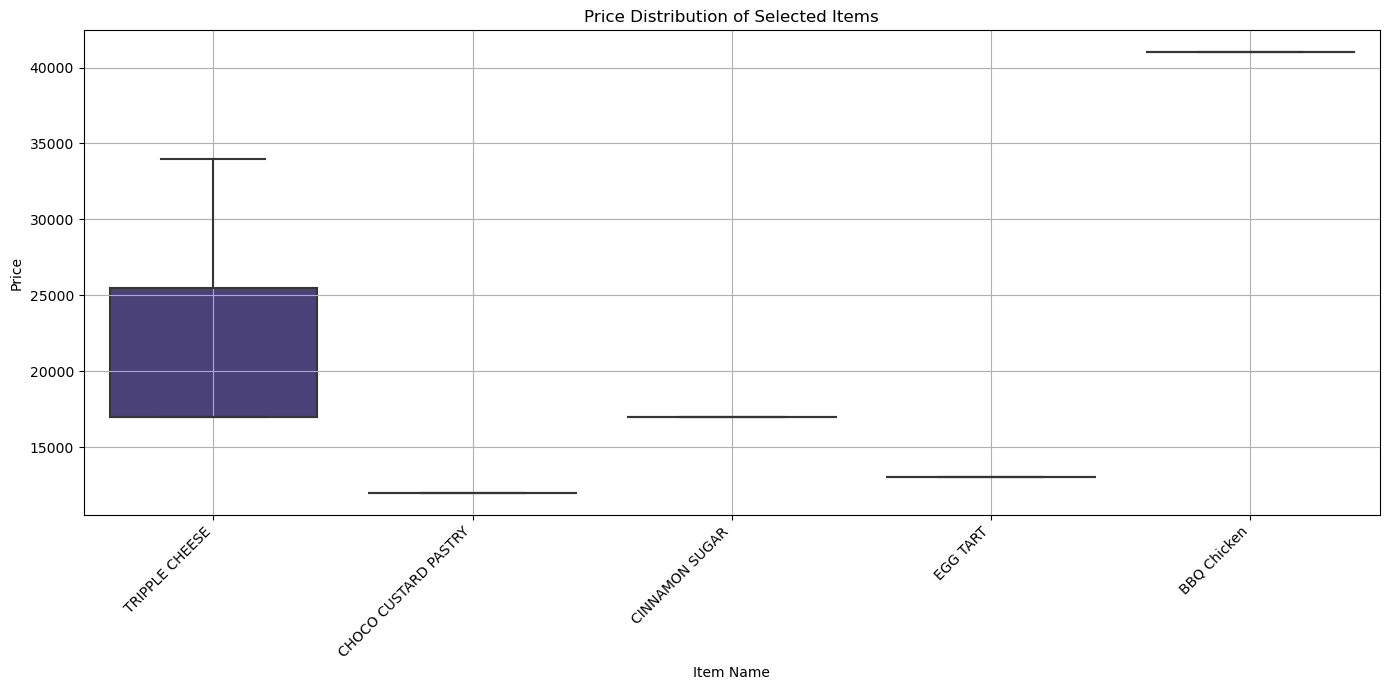


Processing file: train-00001-of-00004-746b6acd0207b060.parquet
File loaded successfully.
                       Name Unit Price Quantity   Price
0                NASI PUTIH      6,000      N/A   6.000
1                 BASO KUAH     43,636      N/A  43,636
2             CARAMELALMOND     23,000      N/A  23,000
3  CHICKEN KATSU CURRY UDON        N/A      N/A  46,364
4                      AYAM     @10000      N/A  20,000


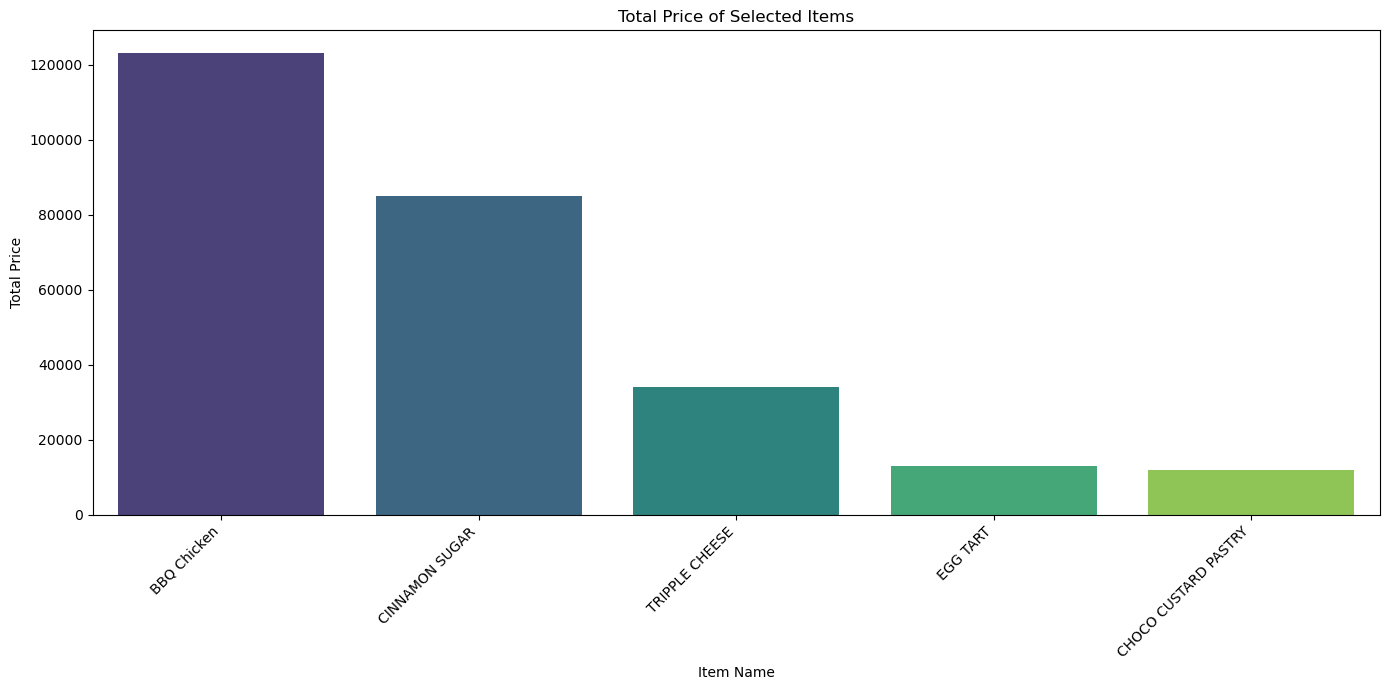

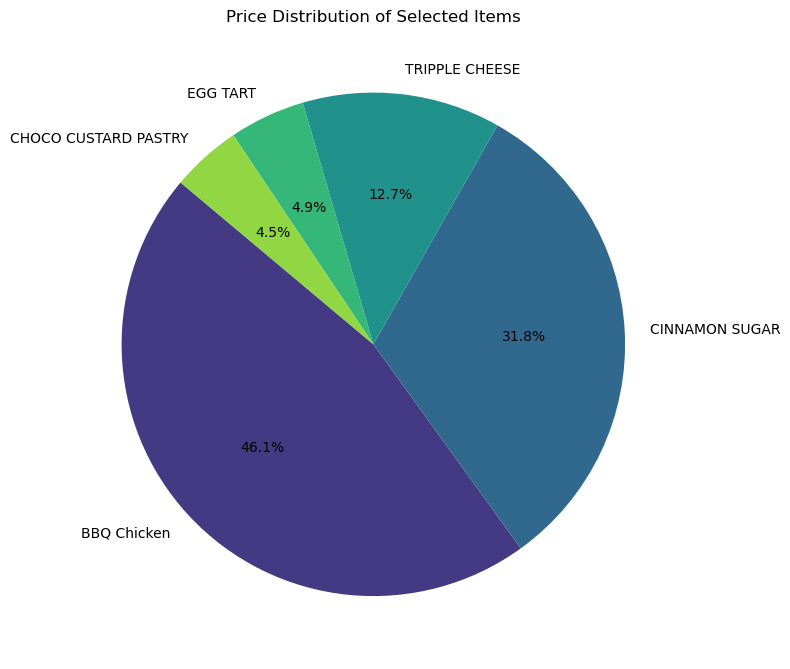

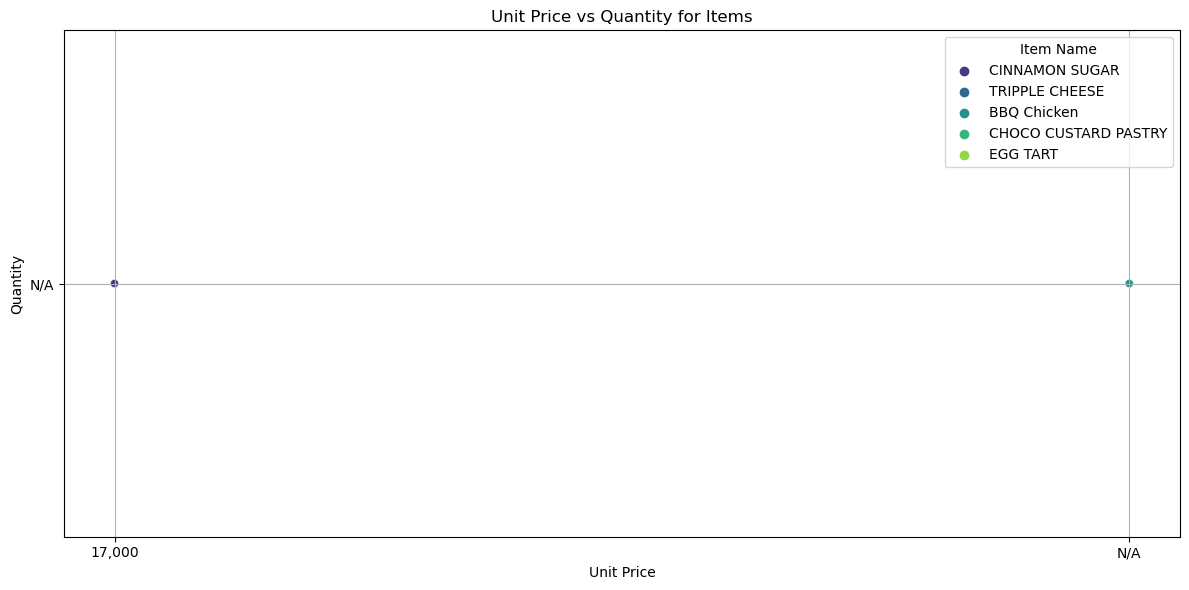

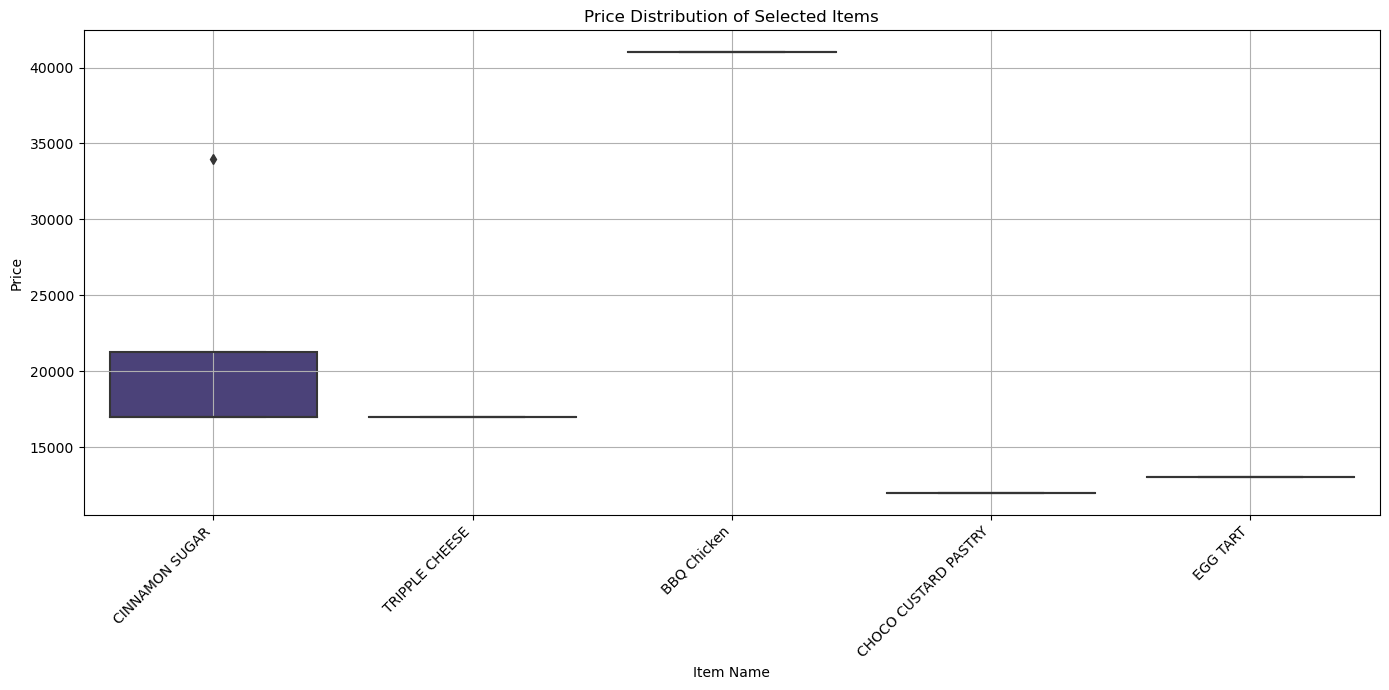


Processing file: train-00002-of-00004-1e1b4c8af5ce0485.parquet
File loaded successfully.
                   Name Unit Price Quantity   Price
0  (TW) MIE GORENG AYAM        N/A      N/A  31,819
1       (TW)NASI GORENG        N/A      N/A  27,273
2           NASI GORENG        N/A      N/A  27,273
3          ES TEH TAWAR        N/A      N/A  13,638
4          Bakso Campur        N/A      N/A  25.455


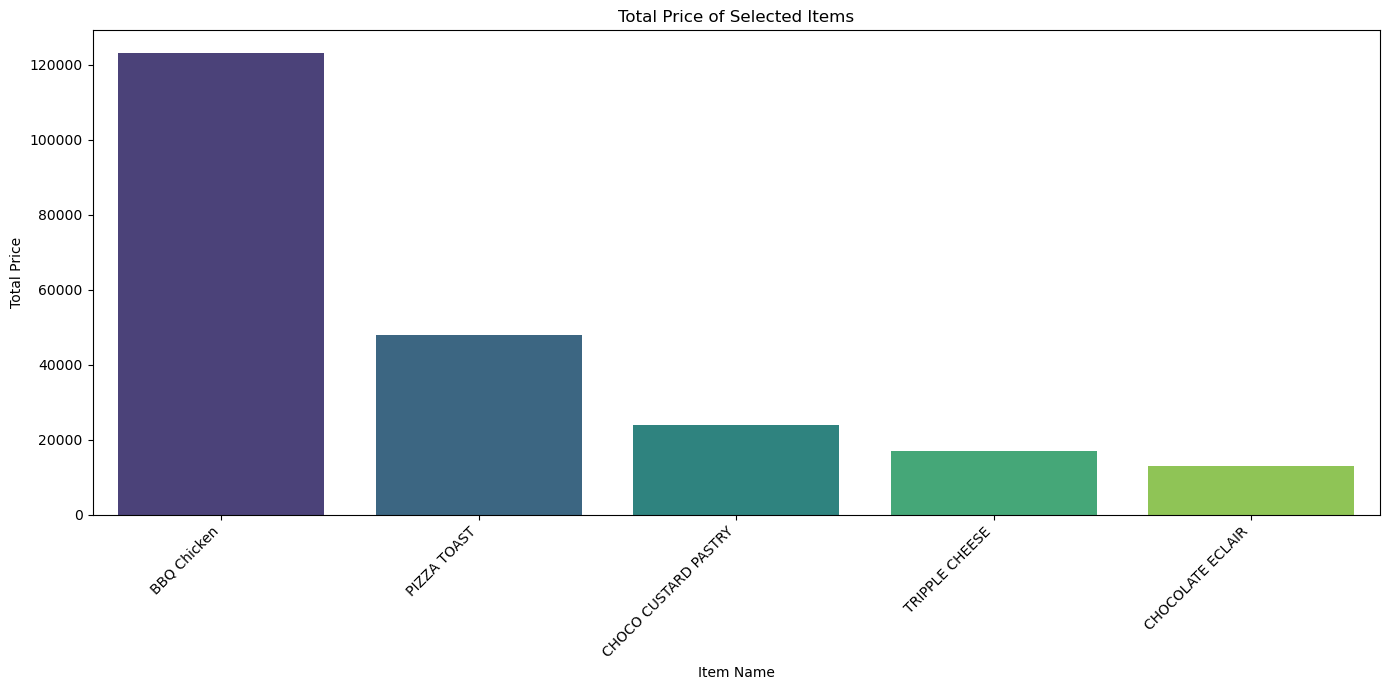

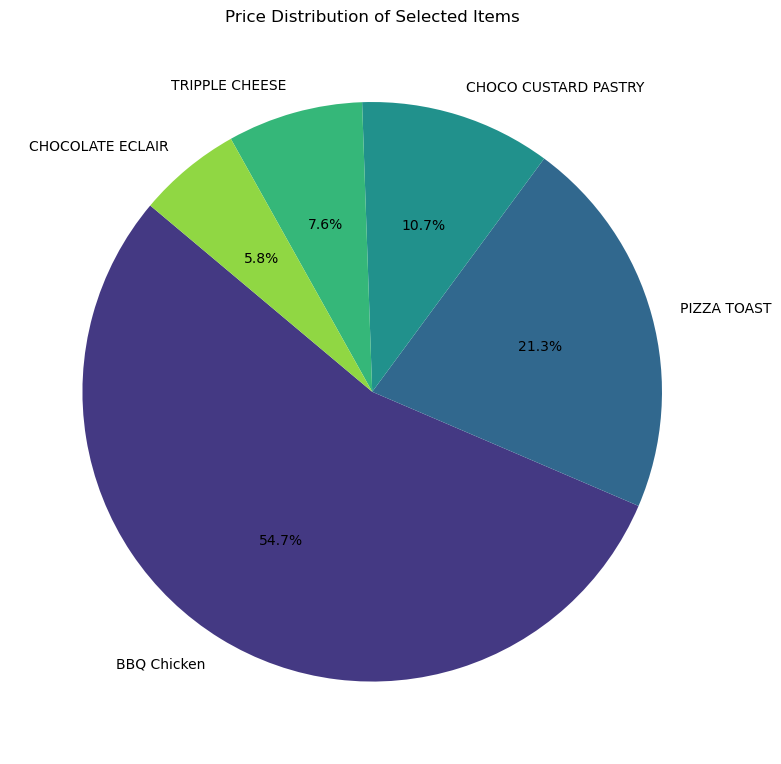

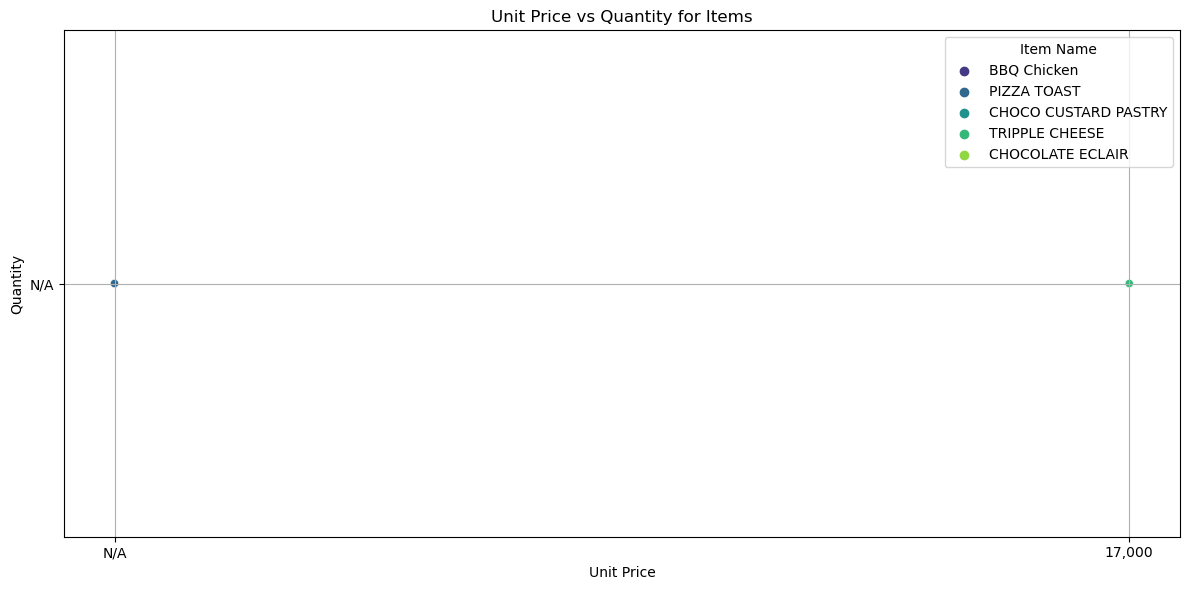

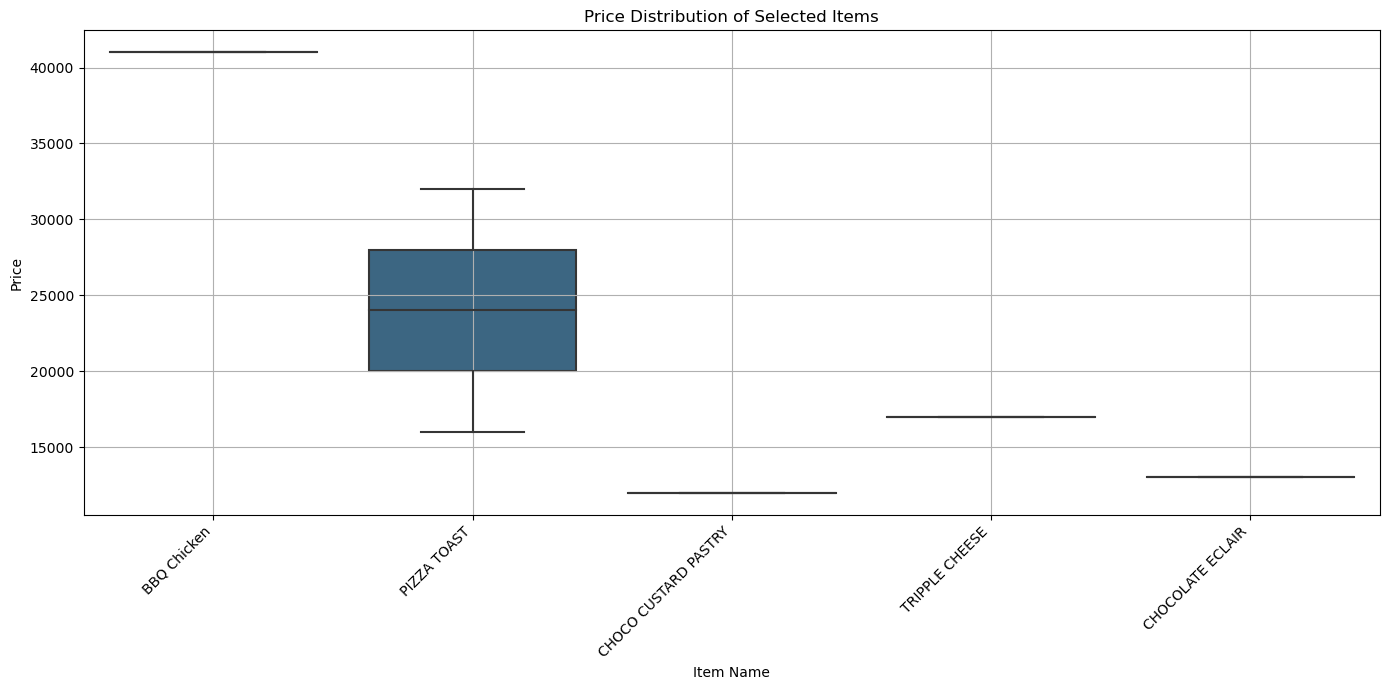


Processing file: train-00003-of-00004-56f1d505044d2c20.parquet
File loaded successfully.
             Name Unit Price Quantity   Price
0  Caramel Medium        N/A      N/A  50.000
1      KOROKE ORI        N/A      N/A  12,600
2    KOROKE CURRY        N/A      N/A  13,500
3  EBI KTSU 1 PCS        N/A      N/A  29,800
4         TSUKUNE        N/A      N/A  35,100


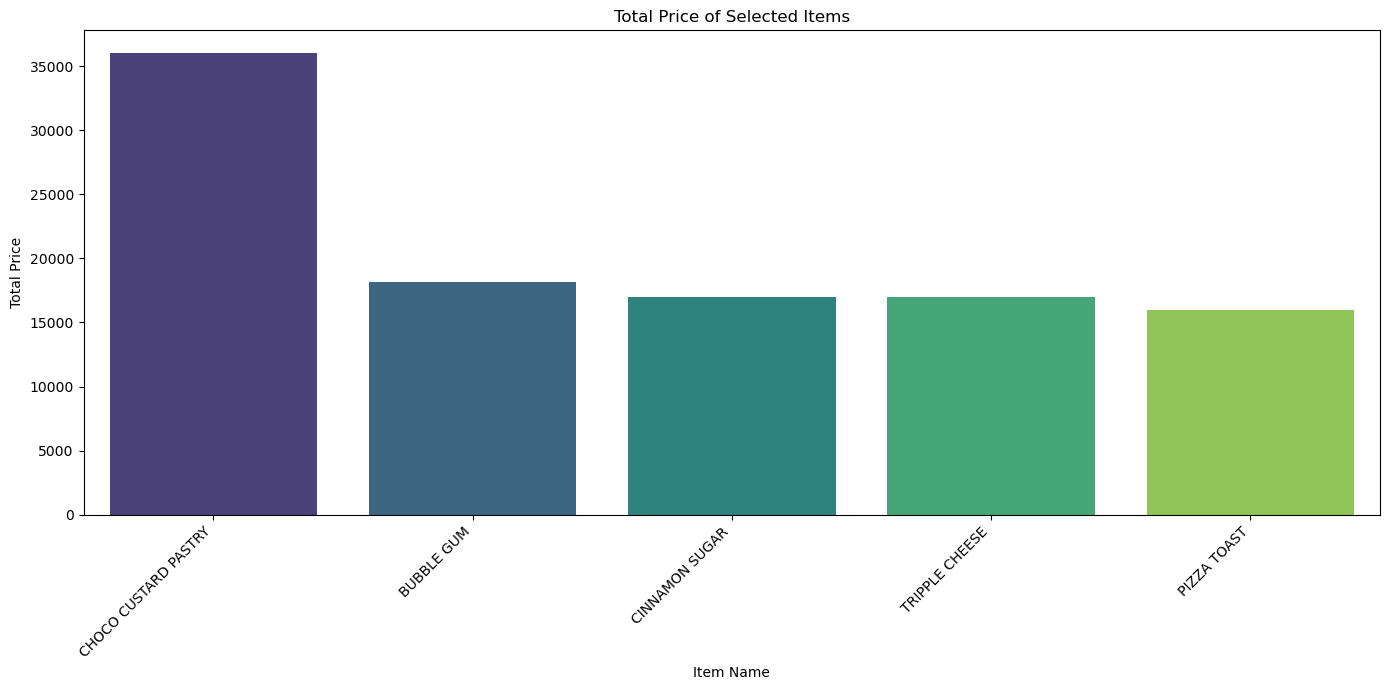

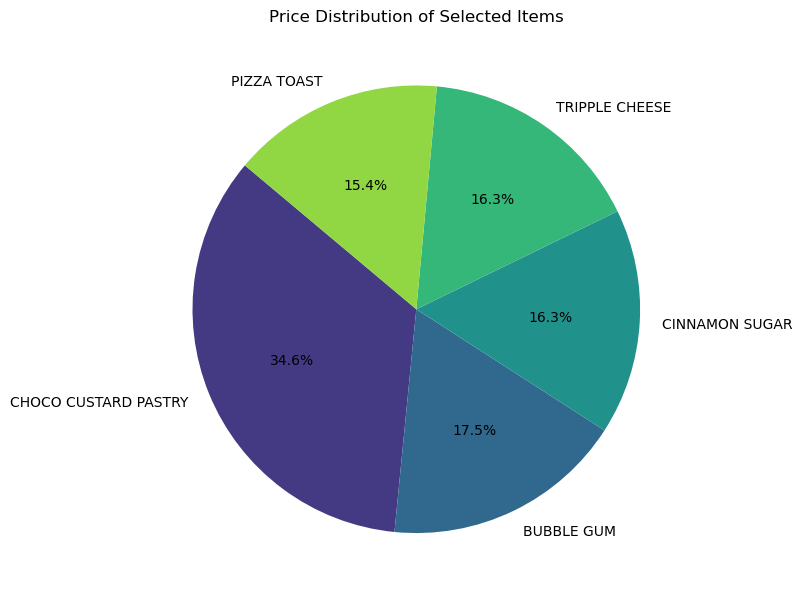

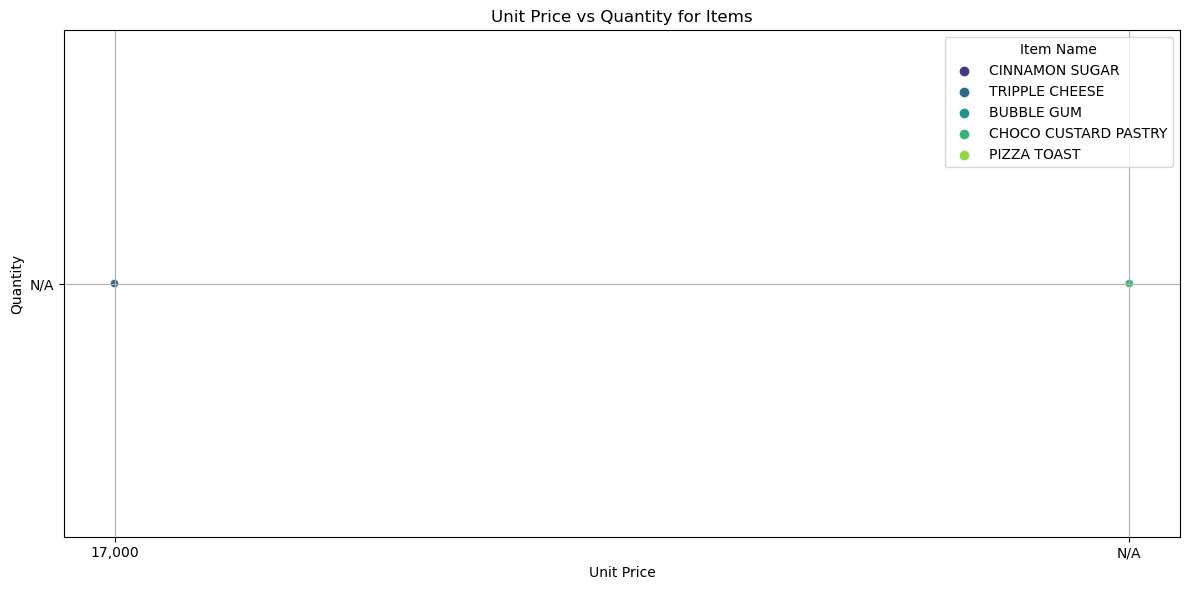

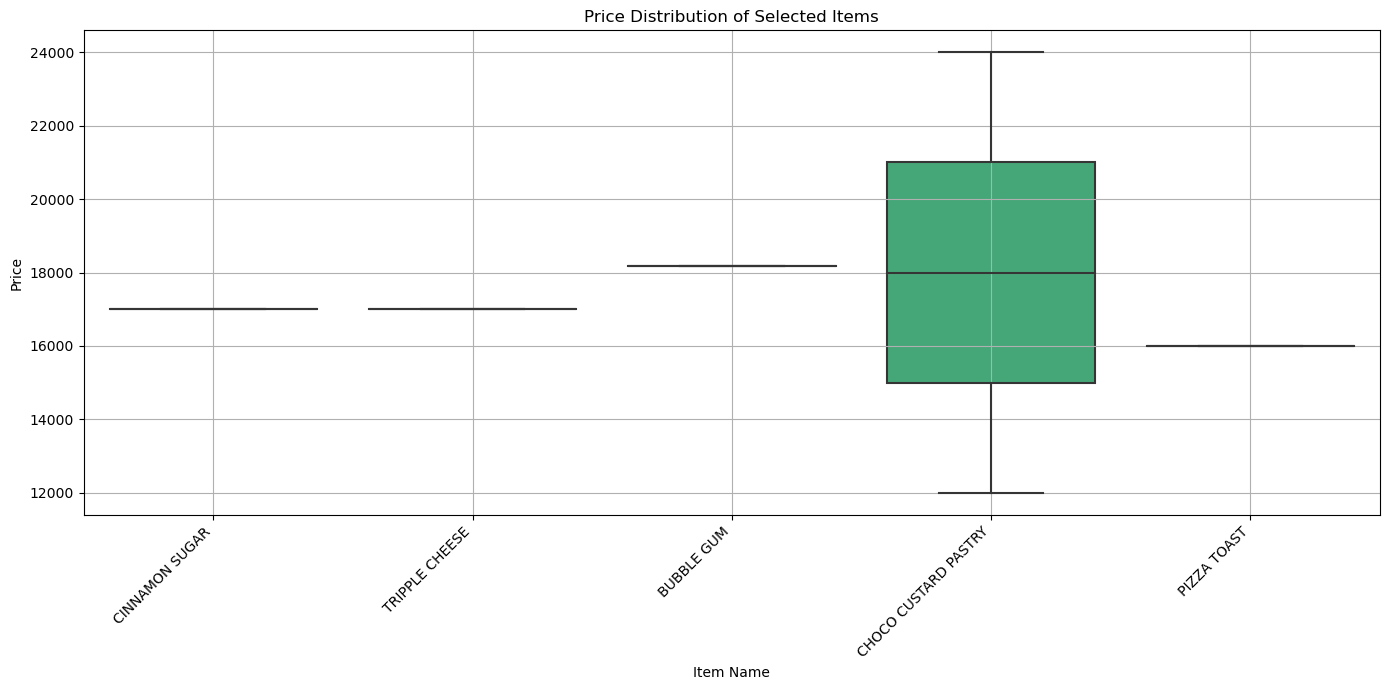


Processing file: validation-00000-of-00001-9031a89e666533f9.parquet
File loaded successfully.
                Name Unit Price Quantity   Price
0       REAL GANACHE        N/A      N/A  16,500
1           EGG TART        N/A      N/A  13,000
2        PIZZA TOAST        N/A      N/A  16,000
3  Kopi Susu Kolonel        N/A      N/A  23.000
4     S-Ovaltine 50%     20,000      N/A  20,000


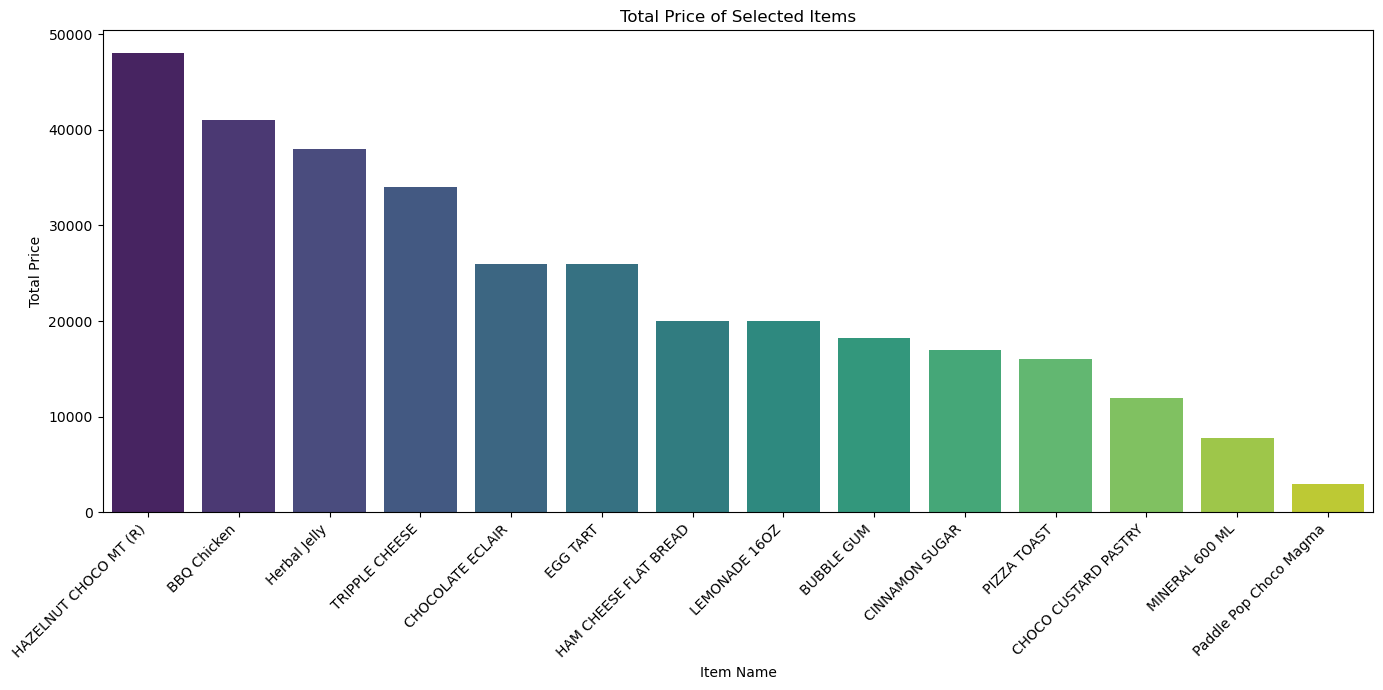

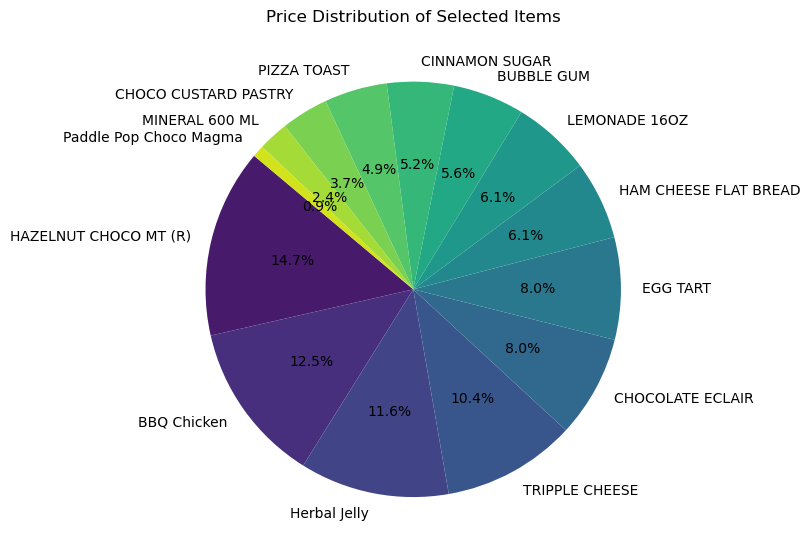

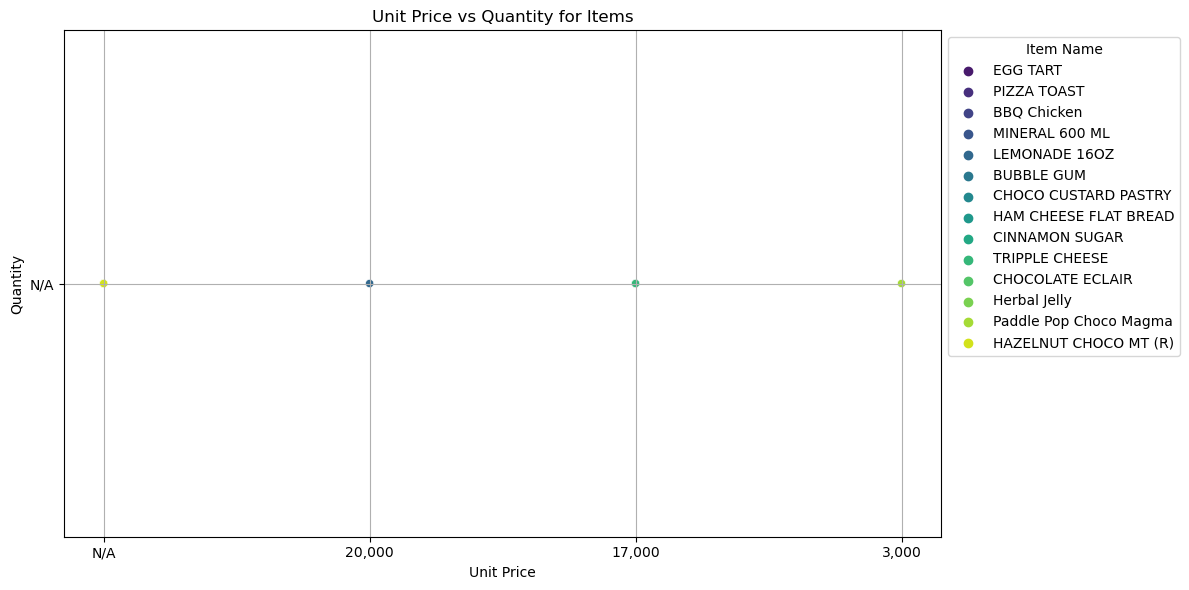

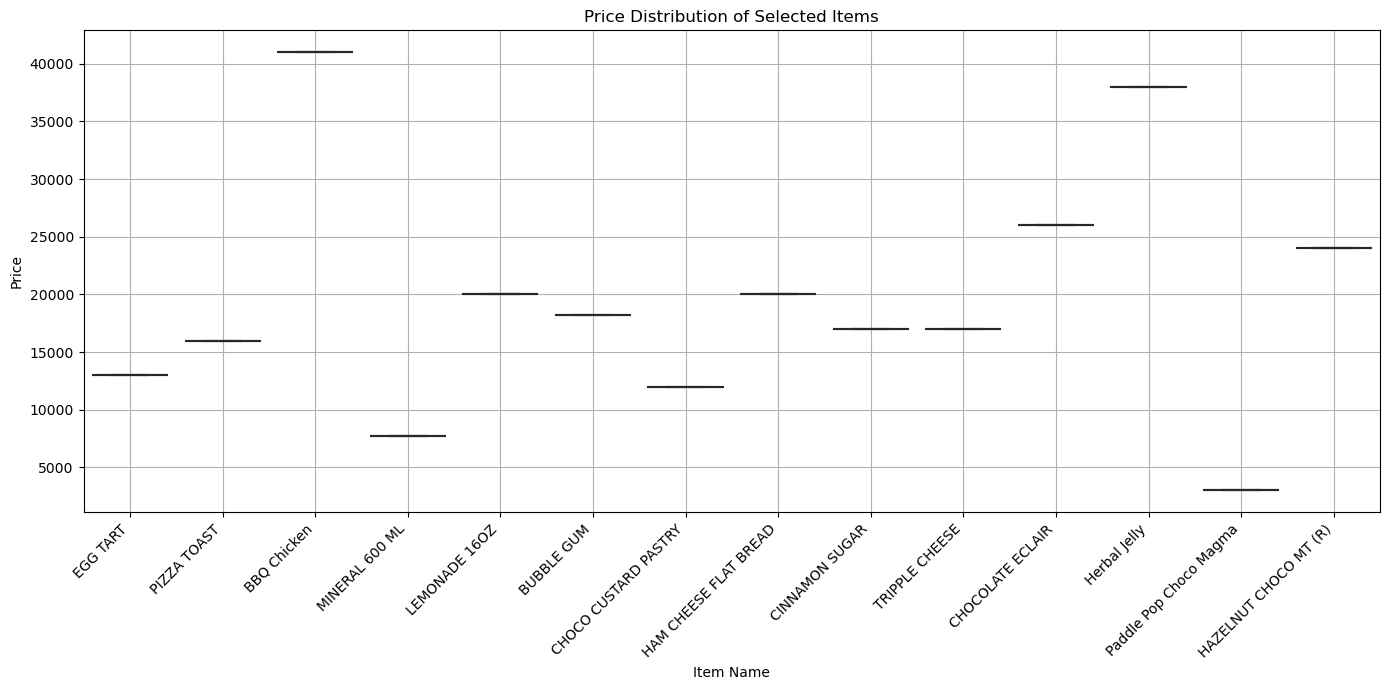

In [5]:
def visualize_data(df):
    df['Price'] = pd.to_numeric(df['Price'].replace(',', '', regex=True), errors='coerce')
    selected_items = [
        'EGG TART', 'PIZZA TOAST', 'BBQ Chicken', 'MINERAL 600 ML',
        'LEMONADE 16OZ', 'Chicken Vege Rice Bowl 39', 'BUBBLE GUM', 'CHOCO CUSTARD PASTRY', 'HAM CHEESE FLAT BREAD',
        'TRIPPLE CHEESE', 'ORIGINAL BREWED TEA ', 'HAZELNUT CHOCO MT (R)',
        'Herbal Jelly', 'Paddle Pop Choco Magma', ' LYCHEE ICE TEA', 'CHOCOLATE ECLAIR', 'CINNAMON SUGAR'
    ]
    filtered_df = df[df['Name'].isin(selected_items)]

    total_price = filtered_df.groupby('Name')['Price'].sum().reset_index()

    top_items = total_price.sort_values(by='Price', ascending=False)

    plt.figure(figsize=(14, 7))
    sns.barplot(x='Name', y='Price', data=top_items, palette='viridis')
    plt.xticks(rotation=45, ha='right')
    plt.title('Total Price of Selected Items')
    plt.xlabel('Item Name')
    plt.ylabel('Total Price')
    plt.tight_layout()
    plt.savefig(os.path.join(output_dir, 'bar_chart.png'))
    plt.show()

    plt.figure(figsize=(8, 8))
    plt.pie(
        top_items['Price'], 
        labels=top_items['Name'], 
        autopct='%1.1f%%', 
        startangle=140, 
        colors=sns.color_palette('viridis', len(top_items))
    )
    plt.title('Price Distribution of Selected Items')
    plt.tight_layout()
    plt.savefig(os.path.join(output_dir, 'pie_chart.png'))
    plt.show()
    
    plt.figure(figsize=(12, 6))
    sns.scatterplot(x='Unit Price', y='Quantity', data=filtered_df, hue='Name', palette='viridis')
    plt.title('Unit Price vs Quantity for Items')
    plt.xlabel('Unit Price')
    plt.ylabel('Quantity')
    plt.legend(bbox_to_anchor=(1, 1), title='Item Name')
    plt.grid(True)
    plt.tight_layout()
    plt.savefig(os.path.join(output_dir, 'scatter_plot.png'))
    plt.show()
    
    plt.figure(figsize=(14, 7))
    sns.boxplot(x='Name', y='Price', data=filtered_df, palette='viridis')
    plt.xticks(rotation=45, ha='right')
    plt.title('Price Distribution of Selected Items')
    plt.xlabel('Item Name')
    plt.ylabel('Price')
    plt.grid(True)
    plt.tight_layout()
    plt.savefig(os.path.join(output_dir, 'box_plot.png'))
    plt.show()
    
    
for filename in os.listdir(directory):
    if filename.endswith('.parquet'):
        file_path = os.path.join(directory, filename)
        print(f"\nProcessing file: {filename}")
        
        df = pd.read_parquet(file_path)
        
        if 'ground_truth' in df.columns:
            print("File loaded successfully.")
            
            all_extracted_data = []
            for index, row in df.iterrows():
                ground_truth = row['ground_truth']
                extracted_data = extract_data(ground_truth)
                all_extracted_data.extend(extracted_data)
            
            extracted_df = pd.DataFrame(all_extracted_data, columns=['Name', 'Unit Price', 'Quantity', 'Price'])
            print(extracted_df.head())
            
            visualize_data(extracted_df)
        else:
            print("The expected columns are not present in this file.")